# Лабораторная работа №2

# Анализ связей между признаками двумерного набора данных

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import random

Загрузка датасета проходит с помощью библиотеки pandas.

In [3]:
df = pd.read_csv('1и3heart.csv')
df.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122.0,N,0.0,Up,0
5,39,M,NAP,120.0,339,0,Normal,170.0,N,0.0,Up,0
6,45,F,ATA,130.0,237,0,Normal,170.0,N,0.0,Up,0
7,54,M,ATA,110.0,208,0,Normal,142.0,N,0.0,Up,0
8,37,M,ASY,140.0,207,0,Normal,130.0,Y,1.5,Flat,1
9,48,F,ATA,120.0,284,0,Normal,120.0,N,0.0,Up,0


Загрузка датасета прошла успешно.

# Предварительный анализ данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             925 non-null    int64  
 1   Sex             925 non-null    object 
 2   ChestPainType   925 non-null    object 
 3   RestingBP       923 non-null    float64
 4   Cholesterol     924 non-null    object 
 5   FastingBS       925 non-null    int64  
 6   RestingECG      924 non-null    object 
 7   MaxHR           924 non-null    float64
 8   ExerciseAngina  925 non-null    object 
 9   Oldpeak         925 non-null    float64
 10  ST_Slope        925 non-null    object 
 11  HeartDisease    925 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 86.8+ KB


In [5]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

Найдем возможные дубликаты в датафрейме.

In [6]:
print(df.duplicated().sum())

3


In [7]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


Поиск пустых значений в исходном датафрейме

In [8]:
print(df.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         2
Cholesterol       1
FastingBS         0
RestingECG        1
MaxHR             1
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Всего строк в датасете около тысячи, поэтому отсутствие 3-4 строчек не исказит общую статистику выборки

In [9]:
df = df.dropna(subset=['RestingBP'])
print(df.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        1
MaxHR             1
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [10]:
df = df.dropna(subset=['RestingECG'])
print(df.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             1
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [11]:
df = df.dropna(subset=['MaxHR'])
print(df.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


# Конвертация данных

Столбец оценки холестерина является текстовым, также в нем присутствуют буквы. Это мешает оценке данных этого столбца, поэтому проводится конвертация данных в числовой тип

In [12]:
df['Cholesterol'] = df['Cholesterol'].str.replace("a","")
df['Cholesterol'] = pd.to_numeric(df['Cholesterol'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 924
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 93.2+ KB


# Реиндексация датасета

In [13]:
df = df.drop_duplicates().reset_index()
df.head(20)

,index,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,40,M,ATA,140.0,289,0,Normal,172.0,N,0.0,Up,0
1,1,49,F,NAP,160.0,180,0,Normal,156.0,N,1.0,Flat,1
2,2,37,M,ATA,130.0,283,0,ST,98.0,N,0.0,Up,0
3,3,48,F,ASY,138.0,214,0,Normal,108.0,Y,1.5,Flat,1
4,4,54,M,NAP,150.0,195,0,Normal,122.0,N,0.0,Up,0
5,5,39,M,NAP,120.0,339,0,Normal,170.0,N,0.0,Up,0
6,6,45,F,ATA,130.0,237,0,Normal,170.0,N,0.0,Up,0
7,7,54,M,ATA,110.0,208,0,Normal,142.0,N,0.0,Up,0
8,8,37,M,ASY,140.0,207,0,Normal,130.0,Y,1.5,Flat,1
9,9,48,F,ATA,120.0,284,0,Normal,120.0,N,0.0,Up,0


In [14]:
df.describe()

,index,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,459.962923,53.539804,132.410033,198.803708,0.233370,136.805889,0.888332,0.553980
std,264.944842,9.421116,18.519724,109.444961,0.423206,25.471867,1.066749,0.497349
min,0.000000,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,231.000000,47.000000,120.000000,173.000000,0.000000,120.000000,0.000000,0.000000
50%,460.000000,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,689.000000,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,924.000000,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Постойка точечной диаграммы

<AxesSubplot:xlabel='Age', ylabel='RestingBP'>

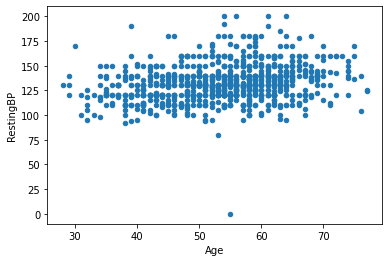

In [15]:
df.plot(x='Age', y='RestingBP', kind='scatter') 

Исходя из этой точечной диаграммы, между RestingBP и Age не наблюдается зависимости.

<AxesSubplot:xlabel='MaxHR', ylabel='RestingBP'>

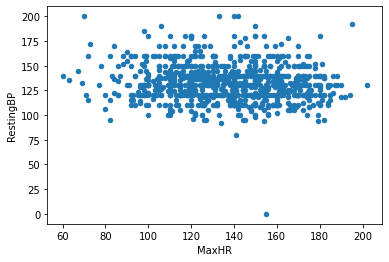

In [16]:
df.plot(x='MaxHR', y='RestingBP', kind='scatter')

Между давлением в состоянии покоя и наибольшим пульсом нет зависимости.

<AxesSubplot:xlabel='Age', ylabel='MaxHR'>

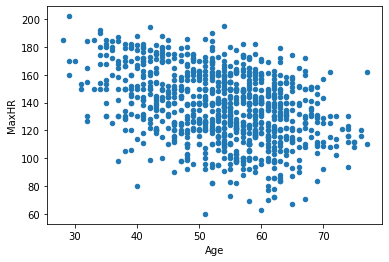

In [17]:
df.plot(x='Age', y='MaxHR', kind='scatter') 

Исходя из этого графика, максимальный пульс челоека обратно пропорционален возрасту. Это единственная числовая зависимость, обнаруженная в этом датасете.

# Матрица диаграмм рассеяния

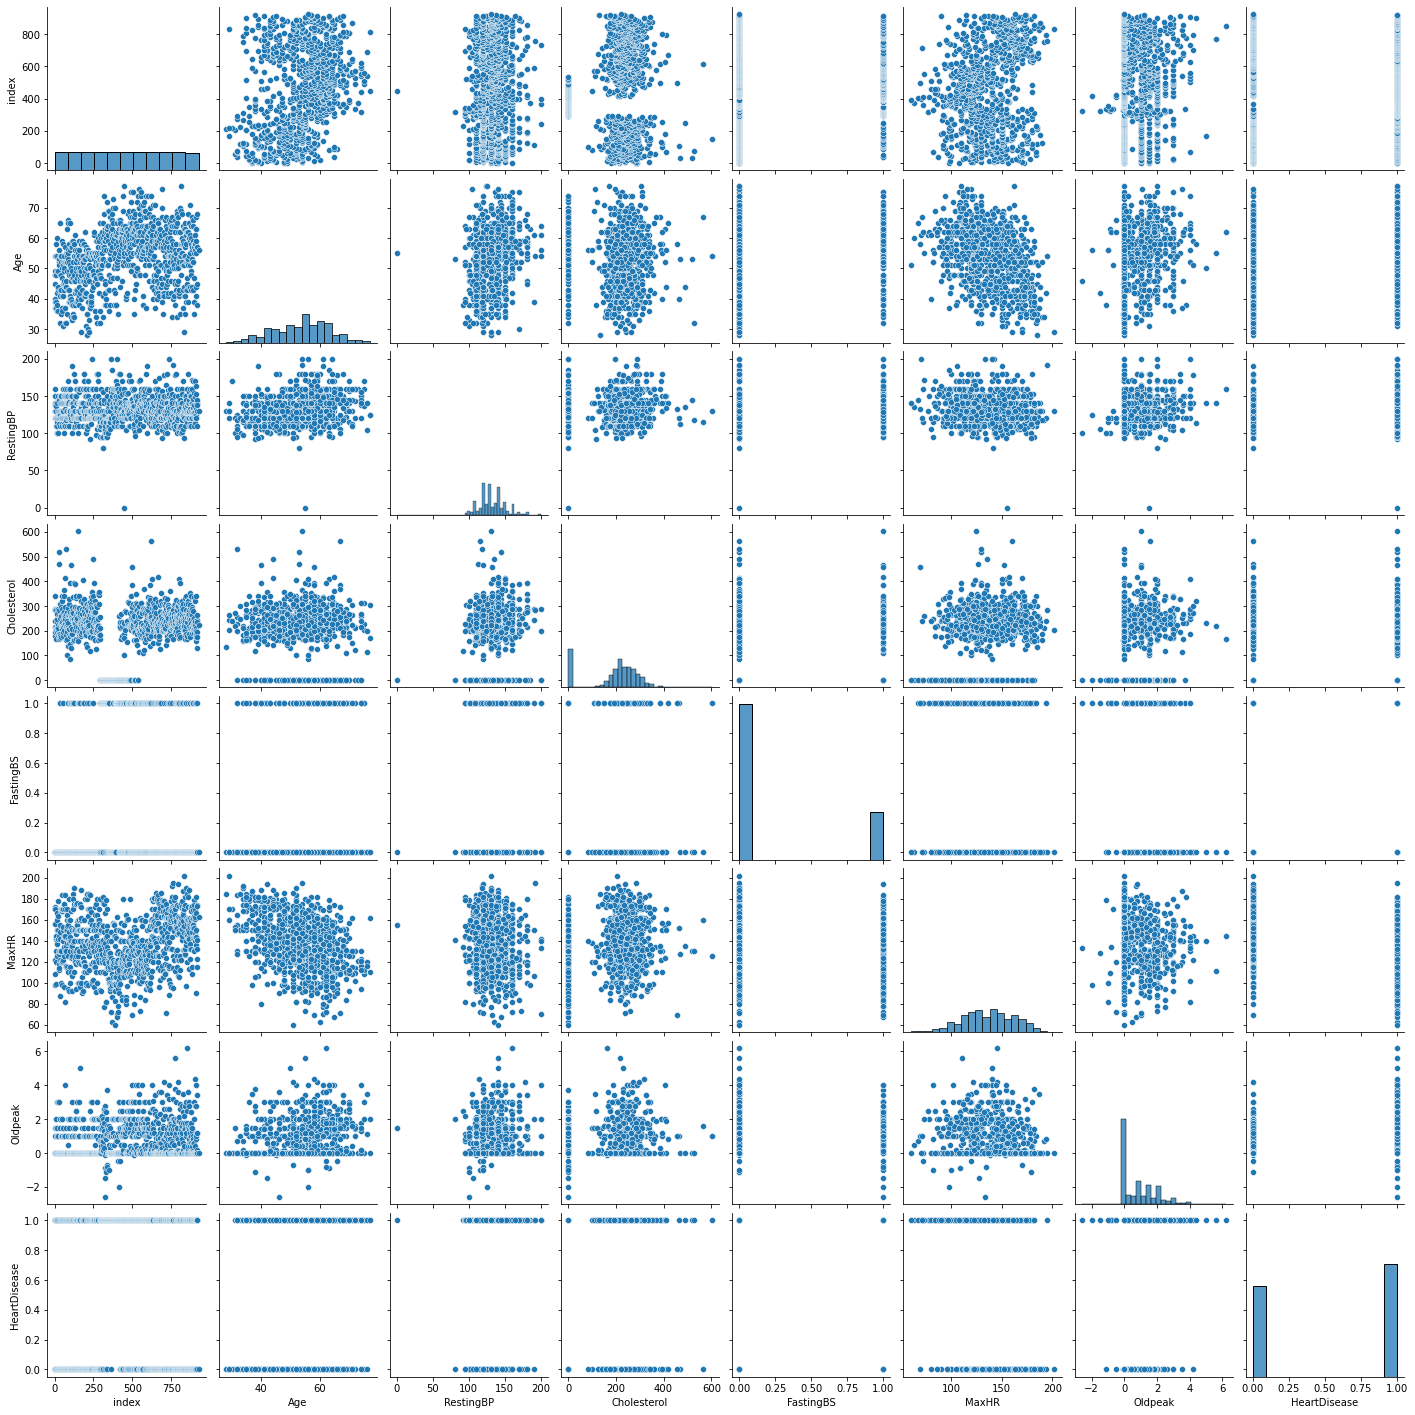

In [18]:
import seaborn as sns
sns.pairplot(df)

Корреляция в данном датасете присутствует только при зависимости макимального сердцебиения от возраста. Остальные данные либо не показывают никакой зависимости, либо некорректны для поиска подобных зависимостей. Вследствие этого можно сделать вывод, что сердечные заболевания бывают при любых данных представленных в датасете показателей.

# Вычисление корреляции

Как оценить численно, насколько тесна взаимосвязь? Для этого находят коэффициент корреляции Пирсона. 
Он помогает определить наличие линейной связи между величинами и принимает значения от -1 до 1.

In [19]:
display(df.corr())

,index,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
index,1.000000,0.286390,0.020408,0.112065,0.030718,0.169524,0.184239,0.049062
Age,0.286390,1.000000,0.253854,-0.095135,0.196728,-0.381037,0.256608,0.279306
RestingBP,0.020408,0.253854,1.000000,0.100924,0.069819,-0.111503,0.164297,0.106874
Cholesterol,0.112065,-0.095135,0.100924,1.000000,-0.261036,0.236008,0.050135,-0.232938
FastingBS,0.030718,0.196728,0.069819,-0.261036,1.000000,-0.131397,0.052226,0.266846
MaxHR,0.169524,-0.381037,-0.111503,0.236008,-0.131397,1.000000,-0.160652,-0.400576
Oldpeak,0.184239,0.256608,0.164297,0.050135,0.052226,-0.160652,1.000000,0.403365
HeartDisease,0.049062,0.279306,0.106874,-0.232938,0.266846,-0.400576,0.403365,1.000000


Исключая бинарные параметры, получается, что наиболее сильно корреляция выражена именно между возрастом и максимальным сердечным пульсом.

Целевая переменная – признак датасета, который предстоит предсказывать модели машинного обучения. Под это описание подходит HeartDisease, поскольку все остальные параметры так или иначе указывают на этот параметр.

# Тепловая карта корреляции

Построим тепловую карту корреляции.

<AxesSubplot:>

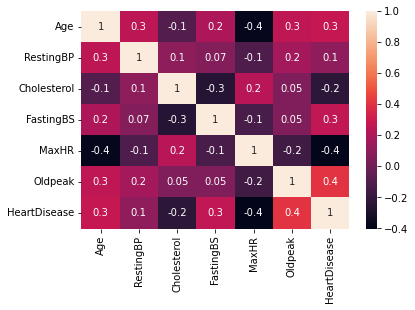

In [20]:
df = df.drop('index', axis=1)
sns.heatmap(df.corr(), annot = True, fmt='.1g')

Исходя из тепловой карты корреляции, наибольшая зависимость между представлена между значениями MaxHR и Age. В остальных случаях корреляция не выражена.

Вывод: была осуществлена постройка точечных диаграмм и вычисление корреляции используя Jupyter Notebook. Получены навыки определения целевой переменной датасета, где целевая переменная - признак датасета, который предстоит предсказывать модели машинного обучения. Также получены навыки определения корреляции между параметрами датасета, а также постройки матрицы диаграмм рассеивания и постройки тепловой карты корреляции.

# Дополнительное задание
Построить boxplot для трех столбцов

<AxesSubplot:xlabel='Age', ylabel='ChestPainType'>

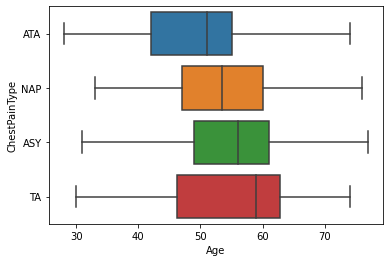

In [22]:
sns.boxplot(data=df, x="Age", y="ChestPainType")

Исходя из этой блочной диаграммы, наибольшее количество жалоб на боль в груди у людей от 45 до 60 лет. При этом каждый тип боли распространен у людей всех возрастов

<AxesSubplot:xlabel='HeartDisease', ylabel='Cholesterol'>

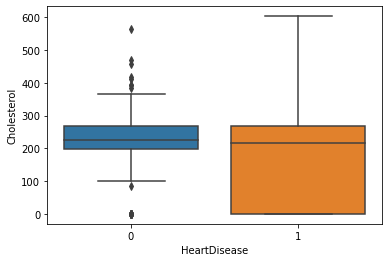

In [24]:
sns.boxplot(data=df, x="HeartDisease", y="Cholesterol")

Данная диаграмма показывает, что у людей с сердечными заболеваниями зачастую пониженный холестерин.

<AxesSubplot:xlabel='ChestPainType', ylabel='Cholesterol'>

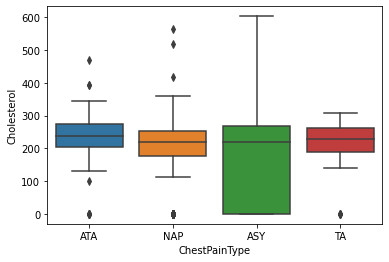

In [25]:
sns.boxplot(data=df, x="ChestPainType", y="Cholesterol")

Данная диаграмма показывает, что типу боли ASY свойственен пониженный холестерин